In [198]:
import pandas as pd

In [204]:
df = pd.read_excel("Audience_Cards_List.xlsx")

### Preprocessing

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Audience Expectation  45 non-null     object
 1   Attraction Category   45 non-null     object
 2   Sub category          45 non-null     object
 3   Increase              35 non-null     object
 4   Decrease              26 non-null     object
 5   Note                  9 non-null      object
dtypes: object(6)
memory usage: 2.2+ KB


In [206]:
# Remove rows that have to be removed in the new edition
df = df[df['Note'] != 'Remove']

In [207]:
print(df.isnull().sum())

Audience Expectation     0
Attraction Category      0
Sub category             0
Increase                 9
Decrease                19
Note                    36
dtype: int64


In [208]:
df['Increase'] = df['Increase'].fillna('')
df['Decrease'] = df['Decrease'].fillna('')

### Defining Categories

In [209]:
categorical_columns = [
    'Continental',
    'Lebanese',
    'Indian',
    'Chinese',
    'Alcohol',
    'Soft drinks',
    'Clothes',
    'Action figure',
    'VIP',
    'Gold',
    'Premium'
]

In [210]:
df['Increase'] = df['Increase'].apply(lambda x: x.split(', '))
df['Decrease'] = df['Decrease'].apply(lambda x: x.split(', '))

In [211]:
df.sample(5)

,Audience Expectation,Attraction Category,Sub category,Increase,Decrease,Note
39,We need more Indian food stalls to spice thing...,Food,Indian,[Indian],[],NaN
22,Too many VIP Lounges and Continental food stal...,"Food, Lounge","VIP, Chinese",[],"[VIP, Continental]",Modify
35,Add more Lebanese food offerings.,Food,Lebanese,[Lebanese],[],Modify
0,The crowd needs more alcohol stalls to keep th...,Beverage,Alcohol,[Alcohol],[],NaN
37,Lebanese food is not getting much attention. L...,Food,Lebanese,[],[Lebanese],NaN


### One hot encoding

In [212]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [213]:
# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categorical_columns)

In [214]:
# Transforming the data for Increase column
encoded_data = mlb.fit_transform(df['Increase'])

/home/sristi/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:994: UserWarning: unknown class(es) [''] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


In [215]:
one_hot_df_increase = pd.DataFrame(encoded_data, columns = categorical_columns)

In [216]:
mlb.classes_

array(['Continental', 'Lebanese', 'Indian', 'Chinese', 'Alcohol',
       'Soft drinks', 'Clothes', 'Action figure', 'VIP', 'Gold',
       'Premium'], dtype=object)

In [217]:
# Step 5: Merge with the original dataframe
# df_final = pd.concat([df, one_hot_df], axis=1)
# df_final.sample(5)

In [218]:
# Transforming the data for Decrease column
encoded_data = mlb.transform(df['Decrease'])

In [219]:
one_hot_df_decrease = pd.DataFrame(encoded_data, columns = categorical_columns)

### Analysis

In [220]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Barplot for individual category increase

In [221]:
# Step 1: Calculate the count of '1's in each column (each music category)
category_counts = one_hot_df_increase.sum(axis=0).reset_index()  # Reset index to convert it to a DataFrame
category_counts.columns = ['Music Category', 'Count']  # Rename columns

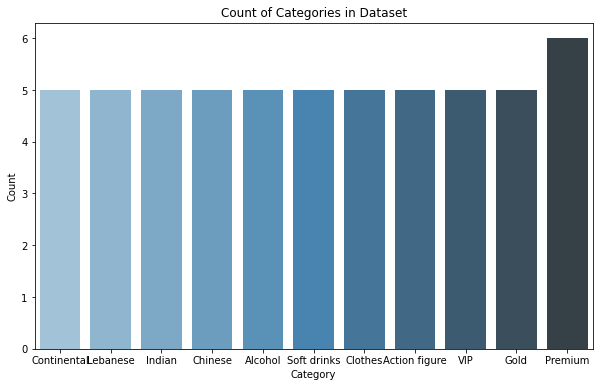

In [222]:
# Step 2: Plot the category counts as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Music Category', y='Count', data=category_counts, palette='Blues_d')
plt.title('Count of Categories in Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

#### Barplot for combinations of categories in increase

In [224]:
# Step 1: Identify unique category combinations (e.g., by creating a string from the row)
one_hot_df_increase['combination'] = one_hot_df_increase.apply(lambda row: '_'.join(row.index[row == 1]), axis=1)

In [225]:
# Step 2: Count occurrences of each combination
combination_counts = one_hot_df_increase['combination'].value_counts().reset_index()
combination_counts.columns = ['combination', 'count']

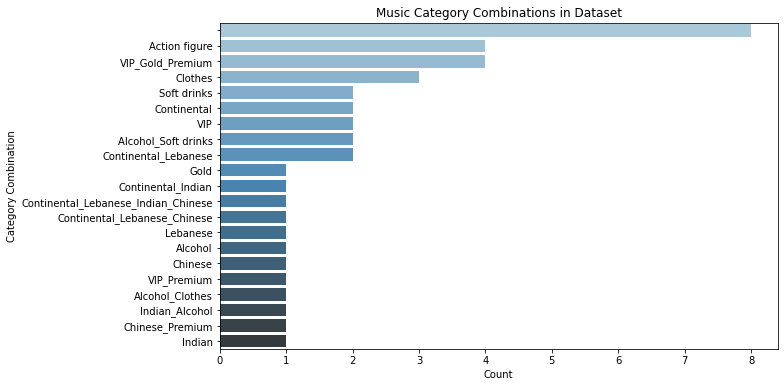

In [192]:
# Step 3: Visualize the most common combinations in case of increase
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='combination', data=combination_counts, palette='Blues_d')
plt.title('Music Category Combinations in Dataset')
plt.xlabel('Count')
plt.ylabel('Category Combination')
plt.show()

#### Barplot for individual category decrease

In [226]:
# Step 1: Calculate the count of '1's in each column (each music category)
category_counts = one_hot_df_decrease.sum(axis=0).reset_index()  # Reset index to convert it to a DataFrame
category_counts.columns = ['Music Category', 'Count']  # Rename columns

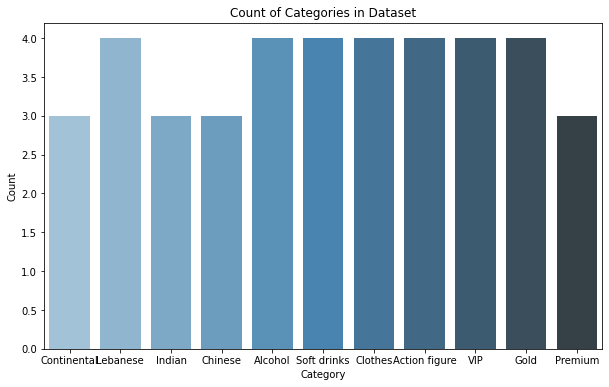

In [227]:
# Step 2: Plot the category counts as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Music Category', y='Count', data=category_counts, palette='Blues_d')
plt.title('Count of Categories in Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

#### Barplot for combinations of categories in decrease

In [228]:
# Step 1: Identify unique category combinations (e.g., by creating a string from the row)
one_hot_df_decrease['combination'] = one_hot_df_decrease.apply(lambda row: '_'.join(row.index[row == 1]), axis=1)

In [229]:
# Step 2: Count occurrences of each combination
combination_counts = one_hot_df_decrease['combination'].value_counts().reset_index()
combination_counts.columns = ['combination', 'count']

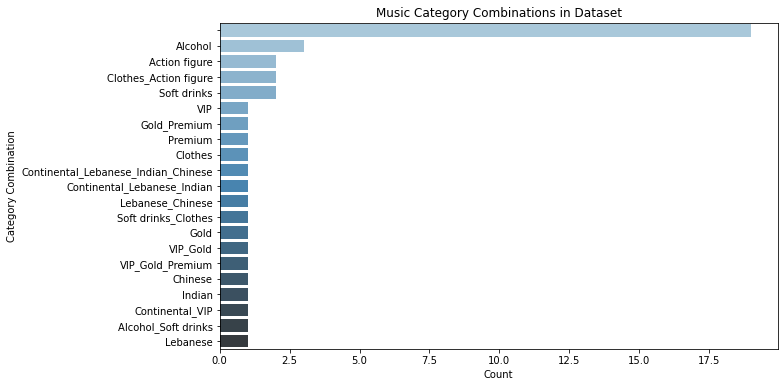

In [230]:
# Step 3: Visualize the most common combinations in case of increase
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='combination', data=combination_counts, palette='Blues_d')
plt.title('Music Category Combinations in Dataset')
plt.xlabel('Count')
plt.ylabel('Category Combination')
plt.show()

In [175]:
category_counts

,Music Category,Count
0,Continental,7
1,Lebanese,5
2,Indian,4
3,Chinese,4
4,Alcohol,5
5,Soft drinks,4
6,Clothes,4
7,Action figure,4
8,VIP,7
9,Gold,5
